In [1]:
#PRIMER PASO: IMPORTAMOS LIBRERIAS Y PAQUETES NECESARIAS
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

In [2]:
bd=pd.read_excel(r'C:\Users\garro\OneDrive\Escritorio\DATA SCIENCE\TRABAJO PRACTICO\ViolenciaGenero2.0.xlsx', sheet_name='casos')
bd2=pd.read_excel(r'C:\Users\garro\OneDrive\Escritorio\DATA SCIENCE\TRABAJO PRACTICO\HabitantesProvincia.xlsx', sheet_name='cantidad')

In [3]:
bd.head()

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,TIPO_VIOLENCIA_FISICA,TIPO_VIOLENCIA_PSICOLOGICA,TIPO_VIOLENCIA_SEXUAL,TIPO_VIOLENCIA_ECONOMICA,TIPO_VIOLENCIA_SIMBOLICA,TIPO_VIOLENCIA_DOMESTICA,TIPO_VIOLENCIA_INSTITUCIONAL,TIPO_VIOLENCIA_LABORAL,TIPO_VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,TIPO_VIOLENCIA_OBSTETRICA,TIPO_VIOLENCIA_MEDIATICA,TIPO_VIOLENCIA_OTRAS,VINCULO_PERSONA_AGRESORA,GENERO_AGRESOR,CASO
0,2020-01-01,Tucumán,Mujer,NaN,NaN,1,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon,1
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1,1,0,0,0,1,0,0,0,0,0,0,Ex pareja,Varon,1
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1,1,0,0,0,1,0,0,0,0,0,0,Ex pareja,Varon,1
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon,1
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon,1


,PROVINCIA,HABITANTES
0,Buenos Aires,17569053
1,CABA,3120612
2,Catamarca,429556
3,Chaco,1142963
4,Chubut,603120


In [5]:
bd['FECHA']=pd.to_datetime(bd.FECHA, errors='coerce')
bd.head()

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,TIPO_VIOLENCIA_FISICA,TIPO_VIOLENCIA_PSICOLOGICA,TIPO_VIOLENCIA_SEXUAL,TIPO_VIOLENCIA_ECONOMICA,TIPO_VIOLENCIA_SIMBOLICA,TIPO_VIOLENCIA_DOMESTICA,TIPO_VIOLENCIA_INSTITUCIONAL,TIPO_VIOLENCIA_LABORAL,TIPO_VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,TIPO_VIOLENCIA_OBSTETRICA,TIPO_VIOLENCIA_MEDIATICA,TIPO_VIOLENCIA_OTRAS,VINCULO_PERSONA_AGRESORA,GENERO_AGRESOR,CASO
0,2020-01-01,Tucumán,Mujer,NaN,NaN,1,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon,1
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1,1,0,0,0,1,0,0,0,0,0,0,Ex pareja,Varon,1
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1,1,0,0,0,1,0,0,0,0,0,0,Ex pareja,Varon,1
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon,1
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon,1


#### DETERMINACION DE OUTLINER

###### USANDO DESCRIBE

In [6]:
estadistica_edad=bd['EDAD'].describe()
estadistica_edad

count    59232.000000
mean        35.800581
std         12.704925
min          1.000000
25%         27.000000
50%         34.000000
75%         43.000000
max        127.000000
Name: EDAD, dtype: float64

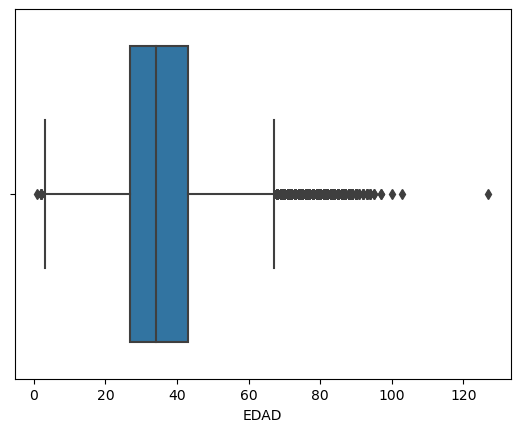

In [7]:
ax=sns.boxplot(x='EDAD', data=bd)

In [8]:
Q1=bd['EDAD'].quantile(0.25)
print('Primer cuartil', Q1)

Q3=bd['EDAD'].quantile(0.75)
print('Tercer cuartil', Q3)

IQR=Q3-Q1
print('Rango intercuartil', IQR)

mediana=bd['EDAD'].median()
print('mediana', mediana)

valor_min=bd['EDAD'].min()
print('Valor mínimo', valor_min)

valor_max=bd['EDAD'].max()
print('Valor máximo', valor_max)

Primer cuartil 27.0
Tercer cuartil 43.0
Rango intercuartil 16.0
mediana 34.0
Valor mínimo 1.0
Valor máximo 127.0


In [9]:
Valor_BI=(Q1-1.5*IQR)
print('Valor_BI', Valor_BI)

Valor_BS=(Q3+1.5*IQR)
print('Valor_BS', Valor_BS)


Valor_BI 3.0
Valor_BS 67.0


In [10]:
def clean_age(age):
    if age>=Valor_BI and age<=Valor_BS:
        return age
    else:
            return mediana
bd['age_clean'] = bd['EDAD'].apply(clean_age)

# Check out the new column and make sure it looks right

print("'EDADES'")
print("Valor mínimo: ", bd["age_clean"].min())
print("Valor máximo: ", bd["age_clean"].max())


'EDADES'
Valor mínimo:  3.0
Valor máximo:  67.0


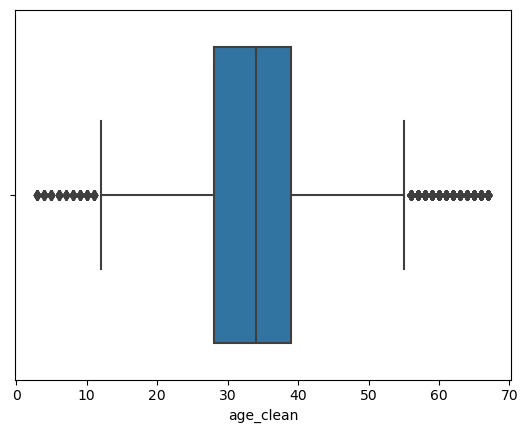

In [11]:
ax=sns.boxplot(x='age_clean', data=bd)

In [12]:
bd['age_clean'].fillna(value=mediana, inplace=True)
bd.head(10)

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,TIPO_VIOLENCIA_FISICA,TIPO_VIOLENCIA_PSICOLOGICA,TIPO_VIOLENCIA_SEXUAL,TIPO_VIOLENCIA_ECONOMICA,TIPO_VIOLENCIA_SIMBOLICA,...,TIPO_VIOLENCIA_INSTITUCIONAL,TIPO_VIOLENCIA_LABORAL,TIPO_VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,TIPO_VIOLENCIA_OBSTETRICA,TIPO_VIOLENCIA_MEDIATICA,TIPO_VIOLENCIA_OTRAS,VINCULO_PERSONA_AGRESORA,GENERO_AGRESOR,CASO,age_clean
0,2020-01-01,Tucumán,Mujer,NaN,NaN,1,1,0,0,0,...,0,0,0,0,0,0,Pareja,Varon,1,34.0
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1,1,0,0,0,...,0,0,0,0,0,0,Ex pareja,Varon,1,39.0
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1,1,0,0,0,...,0,0,0,0,0,0,Ex pareja,Varon,1,22.0
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0,1,0,0,0,...,0,0,0,0,0,0,Pareja,Varon,1,53.0
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1,1,0,0,0,...,0,0,0,0,0,0,Pareja,Varon,1,38.0
5,2020-01-01,Buenos Aires,Mujer,23.0,Argentina,1,1,0,1,0,...,0,0,0,0,0,0,Ex pareja,Varon,1,23.0
6,2020-01-01,Santiago Del Estero,Mujer,25.0,Paraguaya,1,1,0,1,0,...,0,0,0,0,0,0,Pareja,Varon,1,25.0
7,2020-01-01,Santa Fe,Mujer,24.0,Argentina,1,1,0,0,0,...,0,0,0,0,0,0,Ex pareja,Varon,1,24.0
8,2020-01-01,Santa Fe,Mujer,NaN,Argentina,1,1,0,1,0,...,0,0,0,0,0,0,Pareja,Varon,1,34.0
9,2020-01-01,San Juan,Mujer,21.0,Argentina,1,1,0,1,0,...,0,0,0,0,0,0,Pareja,Varon,1,21.0


In [13]:
#PARA CONOCER EN MÁS DETALLE LA CANTIDAD DE DATOS POR PROVINCIA:
#PRIMERO CALCULAMOS LA CANTIDAD DE CASOS TOTALES POR PROVINCIA

serie_provincia=bd.PROVINCIA.value_counts()
serie_provincia

Buenos Aires                                             40490
Ciudad Autónoma de Buenos Aires                          14270
Santa Fe                                                  2965
Tucumán                                                   2585
Mendoza                                                   2570
Córdoba                                                   2010
Jujuy                                                     1031
Salta                                                     1019
Chaco                                                      611
San Juan                                                   522
San Luis                                                   521
Entre Ríos                                                 491
Neuquén                                                    474
Misiones                                                   416
Corrientes                                                 402
Río Negro                                              

In [45]:
seire_

(0     17569053
 1      3120612
 2       429556
 3      1142963
 4       603120
 5      3978984
 6      1197553
 7      1426426
 8       606041
 9       797955
 10      366022
 11      884607
 12     2014533
 13     1280960
 14      726590
 15      762067
 16     1440672
 17      818234
 18      540905
 19      333473
 20     3556522
 21     1054028
 22      190641
 23     1703186
 Name: HABITANTES, dtype: int64,
 0                                          Buenos Aires
 1                                                  CABA
 2                                             Catamarca
 3                                                 Chaco
 4                                                Chubut
 5                                               Cordoba
 6                                            Corrientes
 7                                            Entre Ríos
 8                                               Formosa
 9                                                 Jujuy
 10          

In [46]:
concat=pd.merge(serie_habitantes, serie_provincia)
concat

TypeError: Can only merge Series or DataFrame objects, a <class 'tuple'> was passed

In [32]:
merged_left=pd.concat(serie_habitantes, serie_provincia)
merged_left

C:\Users\garro\AppData\Local\Temp\ipykernel_15448\254772920.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  merged_left=pd.concat(serie_habitantes, serie_provincia)


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"